In [81]:
import sympy 
import sympy.physics.mechanics as spm
spm.init_vprinting()

In [3]:
theta_1, theta_2 = spm.dynamicsymbols('theta_1, theta_2')
theta_1, theta_2

In [4]:
t = sympy.Symbol('t')

In [6]:
theta_1_dot = theta_1.diff(t)
theta_2_dot = theta_2.diff(t)
theta_1_dot, theta_2_dot

In [10]:
m_1, l_1, m_2, l_2, g = sympy.symbols('m_1, l_1, m_2, l_2, g')

In [11]:
U = -m_1*g*l_1*sympy.cos(theta_1) - m_2*g*(l_1*sympy.cos(theta_1) + l_2*sympy.cos(theta_2))
U

In [12]:
x1 = l_1*sympy.sin(theta_1)
y1 = -l_2*sympy.cos(theta_1)
x2 = x1 + l_2*sympy.sin(theta_2)
y2 = y1 - l_2*sympy.cos(theta_2)
x1, y1, x2, y2

In [14]:
x1_dot = x1.diff(t)
x2_dot = x2.diff(t)
y1_dot = y1.diff(t)
y2_dot = y2.diff(t)
x1_dot, y1_dot, x2_dot, y2_dot

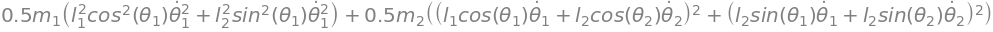

In [15]:
T = 1/2*m_1*(x1_dot**2 + y1_dot**2)+1/2*m_2*(x2_dot**2 + y2_dot**2)
T

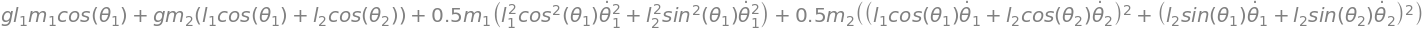

In [16]:
L = T - U
L

## Lagrangian Mechanics
$$
    \frac{d}{dt}\left( \frac{\partial L}{\partial \dot{q_j}}\right) = \frac{\partial L}{\partial q_j}
$$

In [19]:
partialLwrttheta_1 = sympy.diff(L, theta_1)
partialLwrttheta_2 = sympy.diff(L, theta_2)
partialLwrttheta_1_dot = sympy.diff(L, theta_1_dot)
partialLwrttheta_2_dot = sympy.diff(L, theta_2_dot)


In [21]:
LHS1 = partialLwrttheta_1_dot.diff(t)
RHS1 = partialLwrttheta_1
LHS2 = partialLwrttheta_2_dot.diff(t)
RHS2 = partialLwrttheta_2

In [27]:
theta_1_dot2 = theta_1_dot.diff(t)
theta_2_dot2 = theta_2_dot.diff(t)

In [36]:
LHS1 = LHS1.expand()
A11 = LHS1.coeff(theta_1_dot2, 1)
A12 = LHS1.coeff(theta_2_dot2, 1)
B1 = LHS1.coeff(theta_1_dot2, 0) - A12*theta_2_dot2
B1 = B1.expand()

In [38]:
LHS2 = LHS2.expand()
A21 = LHS2.coeff(theta_1_dot2, 1)
A22 = LHS2.coeff(theta_2_dot2, 1)
B2 = LHS2.coeff(theta_2_dot2, 0) - A21*theta_1_dot2
B2 = B2.expand()

In [40]:
b1 = RHS1 - B1
b2 = RHS2 - B2
b1 = b1.expand()
b2 = b2.expand()

In [45]:
M = sympy.Matrix([[A11, A12],[A21, A22]])
b = sympy.Matrix([[b1],[b2]])

In [50]:
Minv = M.inv()
Minv

⎡                                                                             
⎢⎛      2       2             2       2    ⎞ ⎛      2       2             2   
⎢⎝1.0⋅l₂ ⋅m₂⋅sin (θ₂) + 1.0⋅l₂ ⋅m₂⋅cos (θ₂)⎠⋅⎝1.0⋅l₁ ⋅m₁⋅cos (θ₁) + 1.0⋅l₁ ⋅m₂
⎢─────────────────────────────────────────────────────────────────────────────
⎢                 ⎛                                                           
⎢                 ⎜⎛      2       2             2       2    ⎞ ⎛      2       
⎢                 ⎝⎝1.0⋅l₂ ⋅m₂⋅sin (θ₂) + 1.0⋅l₂ ⋅m₂⋅cos (θ₂)⎠⋅⎝1.0⋅l₁ ⋅m₁⋅cos
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                             ────────────────
⎢                                                                             
⎢                                                   

In [57]:
theta_dot2 = Minv*b

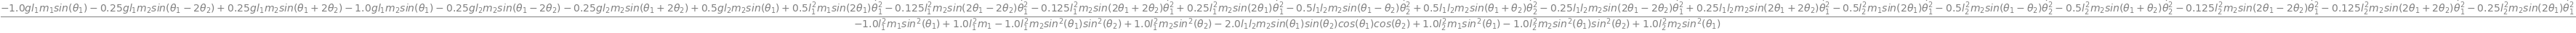

In [59]:
acctheta1 = theta_dot2[0].expand()
acctheta1 = acctheta1.simplify()
acctheta1

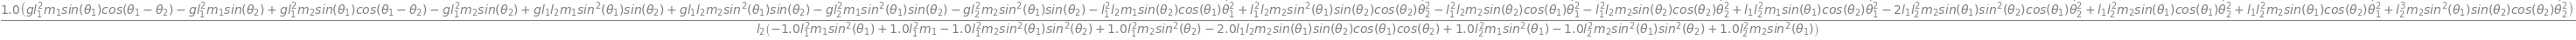

In [60]:
acctheta2 = theta_dot2[1].expand()
acctheta2 = acctheta2.simplify()
acctheta2

In [61]:
Nr1, Dr1 = sympy.fraction(acctheta1)
Nr2, Dr2 = sympy.fraction(acctheta2)

In [64]:
T1, T2, V1, V2 = sympy.symbols('T_1, T_2, V_1, V_2')

In [80]:
print(Dr2.subs(theta_1_dot, V1).subs(theta_2_dot, V2).subs(theta_1, T1).subs(theta_2, T2))

l_2*(-1.0*l_1**2*m_1*sin(T_1)**2 + 1.0*l_1**2*m_1 - 1.0*l_1**2*m_2*sin(T_1)**2*sin(T_2)**2 + 1.0*l_1**2*m_2*sin(T_2)**2 - 2.0*l_1*l_2*m_2*sin(T_1)*sin(T_2)*cos(T_1)*cos(T_2) + 1.0*l_2**2*m_1*sin(T_1)**2 - 1.0*l_2**2*m_2*sin(T_1)**2*sin(T_2)**2 + 1.0*l_2**2*m_2*sin(T_1)**2)
